In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

import sys
import os
import time
import pickle
import torch
import gpytorch
from collections import defaultdict
from IPython.display import HTML

# Allow imports from the parent directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from main import tools

In [2]:
pre_file_path = 'datas/datas_pre.pkl'
with open(pre_file_path, 'rb') as f:
    datas_pre = pickle.load(f)

In [3]:
len(datas_pre)

5

In [25]:
data = datas_pre[2]

In [26]:
data.date

'2024-10-16'

In [10]:
f=data.plot_observations(gif = True, full = False)
HTML(f.to_html5_video())

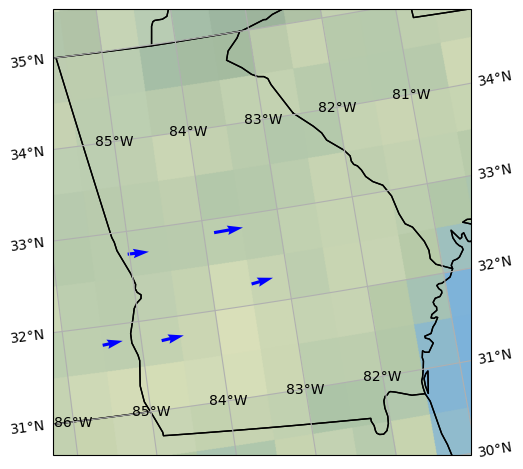

In [31]:
f = data.plot_vel_data(frame = 6)

In [24]:
data.date

'2024-10-16'

In [15]:
fit_file_path = 'datas/datas_fit.pkl'

with open(fit_file_path, 'rb') as f:
    datas_fit = pickle.load(f)
    
data =  datas_fit[2]

In [16]:

indices = torch.randperm(data.m)[:500]
f = data.plot_vel(indices, frame=2, color="blue", gif = True)
HTML(f.to_html5_video())


In [14]:
data.time/60

3.89759437640508

In [27]:
date = '2024-10-16'
hours = 4
start = "00:00"
end = str(hours).zfill(2) + ":00"
time_list = tools.generate_time_ranges(date, minutes=30, start_time=start, end_time=end)
total_times = len(time_list)

In [28]:
from goes2go import goes_nearesttime
from datetime import timedelta 
import xarray

In [29]:
ds = goes_nearesttime(time_list[0], product='ABI-L2-DMWVC', return_as="xarray")

 👮🏻‍♂️ File already exists. Do not overwrite: /home/yf297/data/noaa-goes16/ABI-L2-DMWVC/2024/290/00/OR_ABI-L2-DMWVC-M6C08_G16_s20242900001170_e20242900003543_c20242900034303.nc
📦 Finished downloading [1] files to [/home/yf297/data/noaa-goes16/ABI-L2-DMWVC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [30]:
ds.target_type

<xarray.DataArray 'target_type' ()> Size: 8B
array(0.)
Coordinates:
    lat_image                     float32 4B 30.08
    lon_image                     float32 4B -87.1
    retrieval_local_zenith_angle  float32 4B 62.0
    dataset_name                  <U76 304B 'OR_ABI-L2-DMWVC-M6C08_G16_s20242...
    date_created                  <U22 88B '2024-10-16T00:34:30.3Z'
    time_coverage_start           <U22 88B '2024-10-16T00:01:17.0Z'
    time_coverage_end             <U22 88B '2024-10-16T00:03:54.3Z'
Attributes:
    long_name:      binary flag indicating whether wind vectors are derived f...
    valid_range:    [0 1]
    units:          1
    cell_methods:   time: sum
    flag_values:    [0 1]
    flag_meanings:  clear_sky_targets cloud_targets